# Global value chains: a networks approach
### Katrina Walker, Frank Fanteev, David Rosenfeld

## Introduction

An increasingly important feature of global trade and economics since the 1980s has been the breaking up of production processes into what is known as Global Value Chains (GVCs), in part due to an increased ease of communication and coordination between different locations enabled by new telecommunication and internet technologies (Baldwin, 2016). The increasing global interconnections generated by that process has also increased the vulnerability of the global economic system to contagion of economic shocks. 

As such, understanding the nature of economic interconnections within these global value chains has become a priority area of research for governments and policy research institutions. In particular, the OECD has developed Inter-Country Input-Output (ICIO) tables, and indicators of Trade in Value Added (TiVA) which have improved our understanding of GVCs.

We will use the OECD's ICIO data in a network setting to analyse the GVCs, and specifically use community-detection algorithms to analyse the extent to which GVCs have evolved between 1995 and 2011.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [108]:
# Import the input-output table, with multi-indices for both index and columns: one for country, another for sector
input_output = pd.read_csv("input_output.csv", index_col = [0,1], header = [0,1])

In [109]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()

        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result 

In [56]:
input_output_norm = normalize(input_output)
input_output_norm[input_output_norm<0.01] = 0

where_NaN = np.isnan(input_output_norm)
input_output_norm[where_NaN] = 0

In [57]:
#merge multi-index into one

#input_output_norm.columns = [' '.join(col).strip() for col in input_output_norm.columns.values]
#input_output_norm.columns = [' '.join(col).strip() for col in input_output_norm.columns.values]
#input_output_norm.index = [' '.join(col).strip() for idx in input_output_norm.index.values]


#Wasn't very helpful

In [112]:
#make a filter for several countries
smpl_cntrs = ['FRA','GBR']

In [122]:
input_output_norm.index

Index([u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH',
       u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH',
       u'ZAF C95PVH', u'ZAF C95PVH',
       ...
       u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH',
       u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH', u'ZAF C95PVH',
       u'ZAF C95PVH', u'ZAF C95PVH'],
      dtype='object', length=2176)

In [121]:
input_output_norm.index[0]

'ZAF C95PVH'

In [66]:
input_output_matrix = input_output_norm.as_matrix()

G = nx.from_numpy_matrix(input_output_matrix)
type(G)

networkx.classes.graph.Graph

In [120]:
plt.figure(figsize = (120,120))

nx.draw_networkx_edges(G, pos = nx.spring_layout(G))
#nx.draw_networkx_nodes(G, pos = nx.spring_layout(G))
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [74]:
G.get_edge_data(4, 21)

{'weight': 0.07769473497349917}

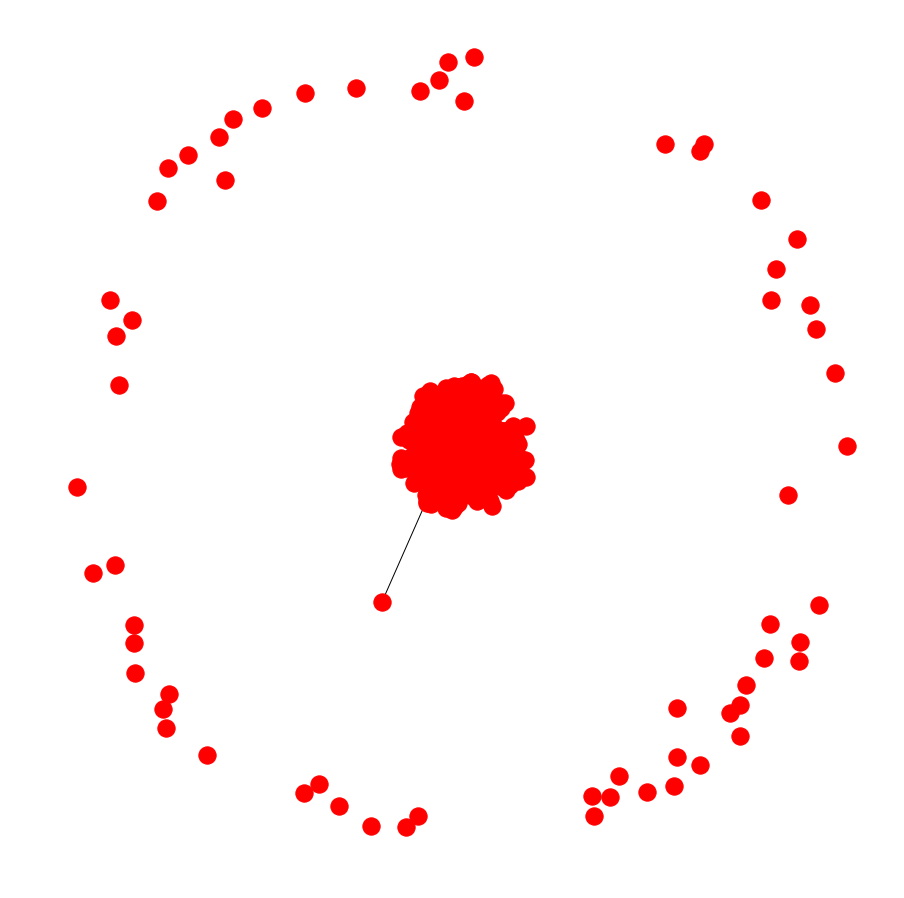

In [115]:
plt.figure(3,figsize=(12,12)) 
nx.draw(G)
plt.show()

In [63]:
input_output_matrix[:]

array([[ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15382354,  0.        ,  0.38191309, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.03724864,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.02981716,
         0.22579774,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [64]:
input_output_norm

,ARG C01T05AGR,ARG C10T14MIN,ARG C15T16FOD,ARG C17T19TEX,ARG C20WOD,ARG C21T22PAP,ARG C23PET,ARG C24CHM,ARG C25RBP,ARG C26NMM,...,ZAF C65T67FIN,ZAF C70REA,ZAF C71RMQ,ZAF C72ITS,ZAF C73T74OBZ,ZAF C75GOV,ZAF C80EDU,ZAF C85HTH,ZAF C90T93OTS,ZAF C95PVH
ZAF C95PVH,1.000000,0.000000,1.000000,0.345329,1.000000,0.050761,0.000000,0.000000,0.026309,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.000000,1.000000,0.000000,0.000000,0.011126,0.016406,1.000000,0.110004,0.000000,0.448413,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.153824,0.000000,0.381913,0.027060,0.039438,0.028339,0.000000,0.120761,0.015579,0.065991,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.021173,0.020064,0.013202,1.000000,0.042405,0.028049,0.000000,0.031122,0.048432,0.034640,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.034988,0.000000,0.000000,0.000000,0.859913,0.000000,0.000000,0.000000,0.000000,0.024201,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.000000,0.012447,0.058742,0.037428,0.048075,1.000000,0.000000,0.092583,0.034622,0.184189,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.268994,0.033624,0.019448,0.023782,0.140916,0.027767,0.054553,0.139738,0.141585,0.257164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.260017,0.033835,0.034412,0.204741,0.173580,0.197931,0.035328,1.000000,1.000000,0.256554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.082999,0.023712,0.051796,0.047614,0.068605,0.102207,0.000000,0.333045,0.229909,0.093836,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
ZAF C95PVH,0.000000,0.031207,0.017087,0.000000,0.024997,0.045845,0.000000,0.027017,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [76]:
#filter input_output by index, extract 

deg_cent = nx.degree_centrality(G)

In [78]:
type(deg_cent.values())

list

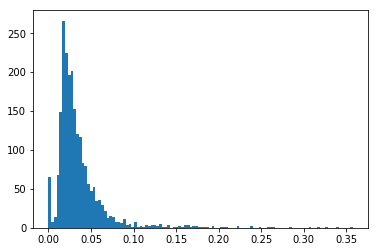

In [81]:
plt.hist(deg_cent.values(), bins = "auto")
plt.show()

In [82]:
#eigenvector centrality
eigen_vec_centrality = nx.eigenvector_centrality(G, max_iter=100, weight='weight')

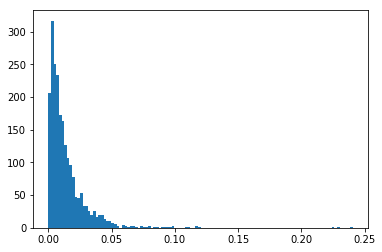

In [88]:
plt.hist(eigen_vec_centrality.values(), bins="auto")
plt.show()

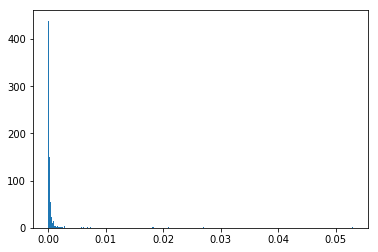

In [91]:
#betweeness centrality
btw_centrality = nx.betweenness_centrality(G)
plt.hist(btw_centrality.values(), bins="auto")
plt.show()



In [99]:
def girvan_newman(G, most_valuable_edge=None):
# If the graph is already empty, simply return its connected
    # components.
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    # If no function is provided for computing the most valuable edge,
    # use the edge betweenness centrality.
    if most_valuable_edge is None:
        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.

            """
            # We have guaranteed that the graph is non-empty, so this
            # dictionary will never be empty.
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)
    # The copy of G here must include the edge weight data.
    g = G.copy().to_undirected()
    # Self-loops must be removed because their removal has no effect on
    # the connected components of the graph.
    g.remove_edges_from(g.selfloop_edges())
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)

In [104]:
#community detection, cluster

gn_partition = girvan_newman(G, most_valuable_edge=None)



In [105]:
list(gn_partition)

NameError: global name '_without_most_central_edges' is not defined

In [ ]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()